# Identifying which food distribution sector produces the most food waste

This project hopes to tabulate and model how much Food Loss and Waste (FLW) is produced throughout the Food Supply Chain (FSC). Data collected will be used to train a linear regression model to predict food loss for each FSC stage. The results will show at which stages of the FSC produces the most and least amount of waste.

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Loading the Dataset

The data used in this project came from [FAO's Food Loss and Waste Database](https://www.fao.org/platform-food-loss-waste/flw-data/en/). It is a database that shows how much food was wasted and in what stage it was wasted.

In [2]:
# read the data from the csv into the dataframe
df = pd.read_csv("data.csv", header=0)

# print the column names
print('---ORIGINAL DATASET---\n')
print('COLUMNS')
print(df.columns)
print()

# print the shape
print('SHAPE')
print(df.shape)

# show the first 5 rows of the dataframe
df.head()

---ORIGINAL DATASET---

COLUMNS
Index(['m49_code', 'country', 'region', 'cpc_code', 'commodity', 'year',
       'loss_percentage', 'loss_percentage_original', 'loss_quantity',
       'activity', 'food_supply_stage', 'treatment', 'cause_of_loss',
       'sample_size', 'method_data_collection', 'reference', 'url', 'notes'],
      dtype='object')

SHAPE
(32580, 18)


,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN


## Preprocessing
This secttion is divided further into
- Data Representation
- Data Cleaning
- Data Transformation
    - Encoding
    - Scaling
- Creating Train and Test Data

#### Data Representation
Extract the necessary columns for this project (commodity, loss_percentage, and food_supply_stage)

In [3]:
# extract necessary columns
df = df[["commodity", "food_supply_stage", "loss_percentage"]]
df.head()

,commodity,food_supply_stage,loss_percentage
0,"Groundnuts, excluding shelled",Whole supply chain,5.22
1,"Groundnuts, excluding shelled",Whole supply chain,5.43
2,"Groundnuts, excluding shelled",Whole supply chain,5.61
3,"Groundnuts, excluding shelled",Whole supply chain,5.40
4,"Groundnuts, excluding shelled",Whole supply chain,5.00


In [4]:
# use groupby on commodity and food_supply_stage
# since there could be same commodity and food_supply_stage with different loss_percentage
df = df.groupby(["commodity", "food_supply_stage"]).mean().reset_index()
df.head()

,commodity,food_supply_stage,loss_percentage
0,"Almonds, in shell",Harvest,1.000000
1,"Almonds, in shell",Retail,1.000000
2,"Almonds, in shell",Storage,3.000000
3,"Almonds, in shell",Transport,1.000000
4,"Almonds, in shell",Whole supply chain,4.217368


#### Data Cleaning
Remove rows with missing values

In [5]:
# print how many missing values on each column
print("Before removing rows with missing values")
print(df.isna().sum())
print(df.shape)
print()

# remove the rows with missing values
df = df.dropna()

# print again how many missing values on each column
print("After removing rows with missing values")
print(df.isna().sum())
print(df.shape)


Before removing rows with missing values
commodity            0
food_supply_stage    0
loss_percentage      0
dtype: int64
(842, 3)

After removing rows with missing values
commodity            0
food_supply_stage    0
loss_percentage      0
dtype: int64
(842, 3)


#### Data Transformation
- Encoding
- Scaling

##### Encoding
One-hot encoding is used for the food_supply_stage feature while label encoding is used for the commodity feature

In [6]:
# print the column names
print('---PREPROCESSED DATASET---\n')
print('COLUMNS')
print(df.columns)
print()

# print the shape
print('SHAPE')
print(df.shape)

# show the first 5 rows of the dataframe
df.head()

---PREPROCESSED DATASET---

COLUMNS
Index(['commodity', 'food_supply_stage', 'loss_percentage'], dtype='object')

SHAPE
(842, 3)


,commodity,food_supply_stage,loss_percentage
0,"Almonds, in shell",Harvest,1.000000
1,"Almonds, in shell",Retail,1.000000
2,"Almonds, in shell",Storage,3.000000
3,"Almonds, in shell",Transport,1.000000
4,"Almonds, in shell",Whole supply chain,4.217368


In [7]:
df

,commodity,food_supply_stage,loss_percentage
0,"Almonds, in shell",Harvest,1.000000
1,"Almonds, in shell",Retail,1.000000
2,"Almonds, in shell",Storage,3.000000
3,"Almonds, in shell",Transport,1.000000
4,"Almonds, in shell",Whole supply chain,4.217368
...,...,...,...
837,Yams,Transport,8.875000
838,Yams,Whole supply chain,5.067353
839,Yams,Wholesale,28.333333
840,Yautia,Whole supply chain,7.591667


In [84]:
def plot_loss_percentage_per_sector(commodity):
  fig = plt.figure()
  fig.patch.set_facecolor('xkcd:light gray')
  ax = fig.add_axes([0,0,1,1])
  
  df2 = df.loc[df['commodity'] == commodity].drop(columns='commodity')
  df2 = df2.sort_values(by=['loss_percentage'])
  
  ax.bar(df2["food_supply_stage"],df2["loss_percentage"])
  
  df2.plot.bar(x='food_supply_stage', y='loss_percentage', title=commodity, legend=False, ax=ax)

  plt.xlabel('Food Supply Stage')
  plt.ylabel('Loss Percentage')

  plt.show()


In [88]:
df['commodity'].unique()

array(['Almonds, in shell',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apple juice', 'Apples', 'Apricots', 'Areca nuts', 'Artichokes',
       'Asparagus', 'Avocados', 'Bambara beans, dry', 'Bananas', 'Barley',
       'Beans, dry', 'Blueberries', 'Bran of Maize',
       'Brazil nuts, in shell', 'Broad beans and horse beans, dry',
       'Broad beans and horse beans, green', 'Buckwheat',
       'Butter of Cow Milk', 'Cabbages', 'Camels', 'Canary seed',
       'Cane sugar, non-centrifugal', 'Canned mushrooms',
       'Cantaloupes and other melons', 'Carrots and turnips',
       'Cashew nuts, in shell', 'Cassava, dry', 'Cassava, fresh',
       'Cattle', 'Cattle fat, unrendered', 'Cauliflowers and broccoli',
       'Cheese from Whole Cow Milk', 'Cheese from whole cow milk',
       'Cherries', 'Chestnuts, in shell', 'Chick peas, dry',
       'Chillies and peppers, dry (<i>Capsicum</i> spp., <i>Pimenta</i> spp.), raw',
       'Chillies and pepp

Sunflower seed


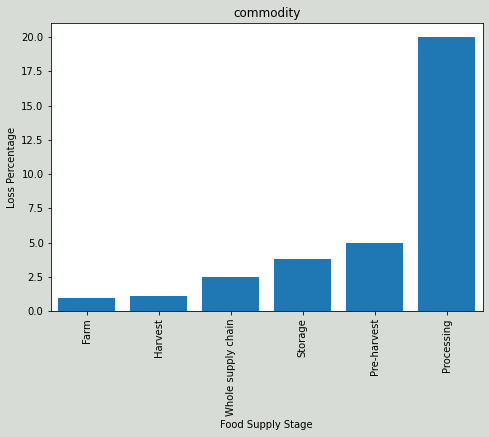

In [90]:
plot_loss_percentage_per_sector('Sunflower seed')